In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
from atomphys import _ureg
from atomphys.data import nist
from pprint import pprint
from atomphys.term import print_term, parse_term, QuantumNumbers

from atomphys.state import State, hyperfine_manifold

from pint import Quantity

In [3]:
parse_term('(3/2,1)3')

{'J1': 1.5, 'J2': 1.0, 'parity': 1, 'J': 3.0}

In [4]:
# atom = 'Yb+'
# ix = 4

atom = 'Na I'
ix = 0
all_states_data = nist.fetch_states(atom, refresh_cache=False)

def _state(ix):
    psd = nist.parse_states1(all_states_data[ix])
    return State(configuration=psd['configuration'], term=psd['term'], energy=psd['energy'])

s0 = _state(0)

In [5]:
s0.energy

0.0 <Unit('rydberg')>

In [6]:
from atomphys.state import HyperfineState

In [7]:
I = 3/2

Ahf = Quantity("planck_constant * 885.81306440 MHz")

hyperfine_manifold(s0, I, Ahf)

[HyperfineState(2p6.3s 2S1/2 F=1 -3.366e-07 Ry),
 HyperfineState(2p6.3s 2S1/2 F=2 2.019×10⁻⁷ Ry)]

In [8]:
states = [_state(ix) for ix in range(3)]

hyperfine_constants = [
    (Quantity("885.81306440 planck_constant * MHz"), 0),  # S1/2
    (Quantity("94.44 planck_constant * MHz"), 0),  # P1/2
    (Quantity("18.534 planck_constant * MHz"), Quantity("2.724 planck_constant * MHz")),  # P3/2
]


In [9]:
hyperfine_states_na = set()

for s, cc in zip(states, hyperfine_constants):
    print(f"Hyperfine manifold of {s}")
    hstates = hyperfine_manifold(s, I, *cc)
    for hs in hstates:
        print(hs, (hs.energy - s.energy).to('MHz', 'sp'))
        hyperfine_states_na.add(hs)
    print()

Hyperfine manifold of State(2p6.3s 2S1/2 0 Ry)
HyperfineState(2p6.3s 2S1/2 F=1 -3.366e-07 Ry) -1.11e+03 MHz
HyperfineState(2p6.3s 2S1/2 F=2 2.019×10⁻⁷ Ry) 664 MHz

Hyperfine manifold of State(2p6.3p 2P*1/2 0.1545 Ry)
HyperfineState(2p6.3p 2P*1/2 F=1 0.1545 Ry) -118 MHz
HyperfineState(2p6.3p 2P*1/2 F=2 0.1545 Ry) 70.8 MHz

Hyperfine manifold of State(2p6.3p 2P*3/2 0.1547 Ry)
HyperfineState(2p6.3p 2P*3/2 F=0 0.1547 Ry) -66.1 MHz
HyperfineState(2p6.3p 2P*3/2 F=1 0.1547 Ry) -50.3 MHz
HyperfineState(2p6.3p 2P*3/2 F=2 0.1547 Ry) -15.9 MHz
HyperfineState(2p6.3p 2P*3/2 F=3 0.1547 Ry) 42.4 MHz



In [10]:
hyperfine_states_na

{HyperfineState(2p6.3s 2S1/2 F=1 -3.366e-07 Ry),
 HyperfineState(2p6.3s 2S1/2 F=2 2.019×10⁻⁷ Ry),
 HyperfineState(2p6.3p 2P*1/2 F=1 0.1545 Ry),
 HyperfineState(2p6.3p 2P*1/2 F=2 0.1545 Ry),
 HyperfineState(2p6.3p 2P*3/2 F=0 0.1547 Ry),
 HyperfineState(2p6.3p 2P*3/2 F=1 0.1547 Ry),
 HyperfineState(2p6.3p 2P*3/2 F=2 0.1547 Ry),
 HyperfineState(2p6.3p 2P*3/2 F=3 0.1547 Ry)}

In [11]:
from atomphys.atom import Atom

na = Atom()
na.add_states(hyperfine_states_na)

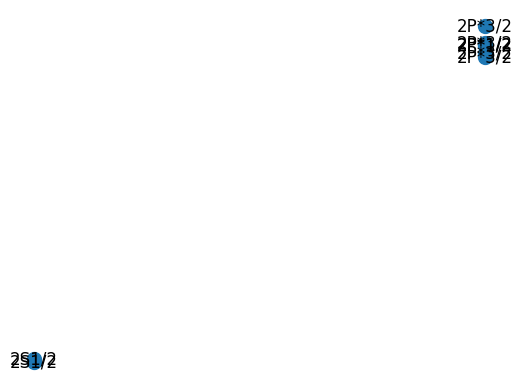

In [12]:
from atomphys.plot import plot_atom

plot_atom(na, spread_threshold=1e-3)